In [689]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud


In [690]:
data = pd.read_csv('dataset.csv')

In [691]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13627 entries, 0 to 13626
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primaryid      13627 non-null  int64  
 1   caseid         13627 non-null  int64  
 2   drug_seq       13627 non-null  int64  
 3   role_cod       13627 non-null  object 
 4   drugname       13627 non-null  object 
 5   prod_ai        13627 non-null  object 
 6   route          13409 non-null  object 
 7   dose_amt       7014 non-null   float64
 8   event_dt       10754 non-null  float64
 9   mfr_dt         13567 non-null  float64
 10  age            11066 non-null  float64
 11  age_grp        11066 non-null  object 
 12  sex            13232 non-null  object 
 13  wt             13627 non-null  float64
 14  occr_country   13627 non-null  object 
 15  indi_drug_seq  13612 non-null  float64
 16  indi_pt        13612 non-null  object 
 17  outc_cod       11387 non-null  object 
 18  pt    

In [692]:
data.describe()

primaryid        caseid      drug_seq     dose_amt      event_dt  \
count  1.362700e+04  1.362700e+04  13627.000000  7014.000000  10754.000000   
mean   7.051987e+08  1.414254e+07      9.233654   296.745238   2019.315789   
std    5.326832e+08  2.968381e+06     10.155232    98.535598      2.560485   
min    7.993046e+07  7.056790e+06      1.000000     0.100000   2009.000000   
25%    1.739594e+08  1.172587e+07      2.000000   300.000000   2018.000000   
50%    8.609198e+08  1.438304e+07      6.000000   300.000000   2019.000000   
75%    1.189729e+09  1.732467e+07     13.000000   375.000000   2021.000000   
max    1.670401e+09  1.760662e+07     68.000000  3000.000000   2024.000000   

             mfr_dt           age            wt  indi_drug_seq  dsg_drug_seq  
count  13567.000000  11066.000000  13627.000000   13612.000000  11573.000000  
mean    2019.685487     51.795319     77.137814       1.008522      1.039402  
std        0.578050     17.663965     14.971888       0.155002      0.362667  
min     2005.000000      3.000000     11.350000       1.000000      1.000000  
25%     2019.000000     40.000000     65.000000       1.000000      1.000000  
50%     2020.000000     55.000000     76.000000       1.000000      1.000000  
75%     2020.000000     65.000000     88.000000       1.000000      1.000000  
max     2020.000000     89.000000    259.000000       5.000000     25.000000

In [693]:
gender_distribution = data['sex'].value_counts().reset_index()
gender_distribution.columns = ['Category', 'No. of Reports']
gender_distribution['Report(%)'] = (gender_distribution['No. of Reports'] / gender_distribution['No. of Reports'].sum()) * 100
gender_distribution_table = gender_distribution.to_markdown(index=False)

age_group_distribution = data['age_grp'].value_counts().reset_index()
age_group_distribution.columns = ['Category', 'No. of Reports']
age_group_distribution['Report(%)'] = (age_group_distribution['No. of Reports'] / age_group_distribution['No. of Reports'].sum()) * 100


country_distribution = data['occr_country'].value_counts().reset_index()
country_distribution.columns = ['Category', 'No. of Reports']
country_distribution['Report(%)'] = (country_distribution['No. of Reports'] / country_distribution['No. of Reports'].sum()) * 100

year_distribution = data['event_dt'].value_counts().reset_index()  # Assuming event_dt contains the year
year_distribution.columns = ['Category', 'No. of Reports']
year_distribution['Report(%)'] = (year_distribution['No. of Reports'] / year_distribution['No. of Reports'].sum()) * 100

gender_distribution_table = gender_distribution.to_markdown(index=False)
age_group_distribution_table = age_group_distribution.to_markdown(index=False)
year_distribution_table = year_distribution.to_markdown(index=False)
country_distribution_table = country_distribution.to_markdown(index=False)

print("Gender Distribution")
print(gender_distribution_table)


Gender Distribution
| Category   |   No. of Reports |   Report(%) |
|:-----------|-----------------:|------------:|
| F          |             9134 |     69.0296 |
| M          |             4098 |     30.9704 |


In [694]:
print("\nAge Group Distribution")
print(age_group_distribution_table)



Age Group Distribution
| Category   |   No. of Reports |   Report(%) |
|:-----------|-----------------:|------------:|
| A          |             6377 |    57.627   |
| E          |             4067 |    36.7522  |
| T          |              405 |     3.65986 |
| C          |              217 |     1.96096 |


In [695]:
print("\nReport Year Distribution")
print(year_distribution_table)



Report Year Distribution
|   Category |   No. of Reports |   Report(%) |
|-----------:|-----------------:|------------:|
|       2020 |             1602 |   14.8968   |
|       2019 |             1576 |   14.655    |
|       2023 |             1297 |   12.0606   |
|       2018 |             1267 |   11.7817   |
|       2021 |             1237 |   11.5027   |
|       2017 |             1165 |   10.8332   |
|       2022 |              963 |    8.95481  |
|       2016 |              875 |    8.13651  |
|       2015 |              315 |    2.92914  |
|       2024 |              142 |    1.32044  |
|       2014 |              121 |    1.12516  |
|       2013 |              111 |    1.03217  |
|       2011 |               46 |    0.427748 |
|       2010 |               24 |    0.223173 |
|       2009 |               13 |    0.120885 |


In [696]:
print("\nReport Country Distribution")
print(country_distribution_table)


Report Country Distribution
| Category   |   No. of Reports |   Report(%) |
|:-----------|-----------------:|------------:|
| CA         |            10376 | 76.143      |
| US         |             2639 | 19.366      |
| BR         |              231 |  1.69516    |
| JP         |               65 |  0.476994   |
| PA         |               39 |  0.286197   |
| ZA         |               34 |  0.249505   |
| DE         |               30 |  0.220151   |
| FR         |               29 |  0.212813   |
| CO         |               23 |  0.168783   |
| AU         |               19 |  0.139429   |
| GB         |               14 |  0.102737   |
| IE         |               13 |  0.0953988  |
| GR         |                9 |  0.0660454  |
| ES         |                8 |  0.058707   |
| SA         |                8 |  0.058707   |
| IT         |                8 |  0.058707   |
| BE         |                7 |  0.0513686  |
| MX         |                6 |  0.0440302  |
| PT       

In [697]:
top_20_adverse_events = data['indi_pt'].value_counts().head(20).reset_index()
top_20_adverse_events.columns = ['Adverse Event', 'No. of Occurrences']
top_20_adverse_events['Report(%)'] = (top_20_adverse_events['No. of Occurrences'] / data.shape[0]) * 100

top_20_adverse_events_table = top_20_adverse_events.to_markdown(index=False)


print(top_20_adverse_events_table)

| Adverse Event                         |   No. of Occurrences |   Report(%) |
|:--------------------------------------|---------------------:|------------:|
| Asthma                                |                 9752 |  71.5638    |
| Chronic spontaneous urticaria         |                 1546 |  11.3451    |
| Product used for unknown indication   |                 1182 |   8.67396   |
| Idiopathic urticaria                  |                  376 |   2.75923   |
| Urticaria                             |                  313 |   2.29691   |
| Urticaria chronic                     |                   57 |   0.418287  |
| Chronic obstructive pulmonary disease |                   28 |   0.205474  |
| Dermatitis atopic                     |                   20 |   0.146767  |
| Immunodeficiency common variable      |                   20 |   0.146767  |
| Hypertension                          |                   16 |   0.117414  |
| Cystic fibrosis                       |           

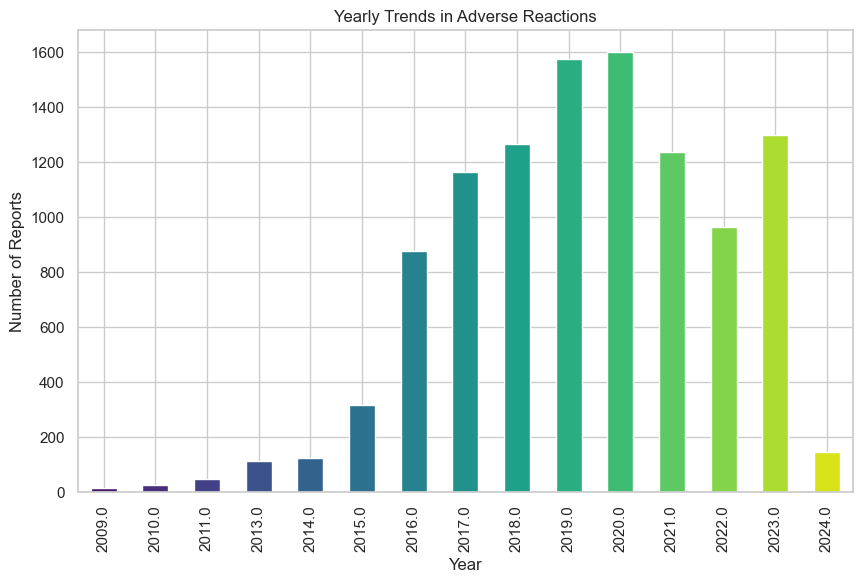

In [698]:
sns.set(style="whitegrid")

# 1. Yearly Trends in Adverse Reactions
plt.figure(figsize=(10, 6))
yearly_trends = data['event_dt'].value_counts().sort_index()
yearly_trends.plot(kind='bar', color=sns.color_palette("viridis", len(yearly_trends)))
plt.title('Yearly Trends in Adverse Reactions')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.show()

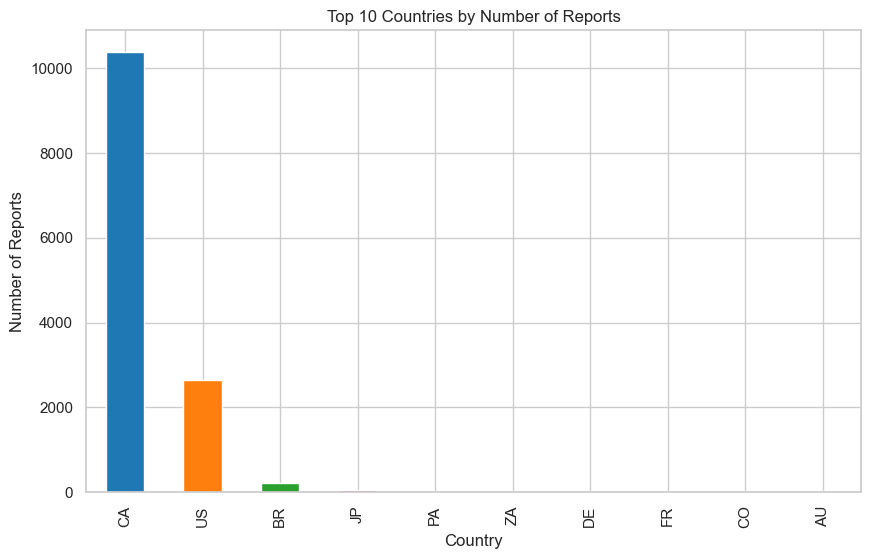

In [699]:
# 2. Top 10 Countries by Number of Reports
plt.figure(figsize=(10, 6))
top_10_countries = data['occr_country'].value_counts().head(10)
top_10_countries.plot(kind='bar', color=sns.color_palette("tab10", len(top_10_countries)))
plt.title('Top 10 Countries by Number of Reports')
plt.xlabel('Country')
plt.ylabel('Number of Reports')
plt.show()

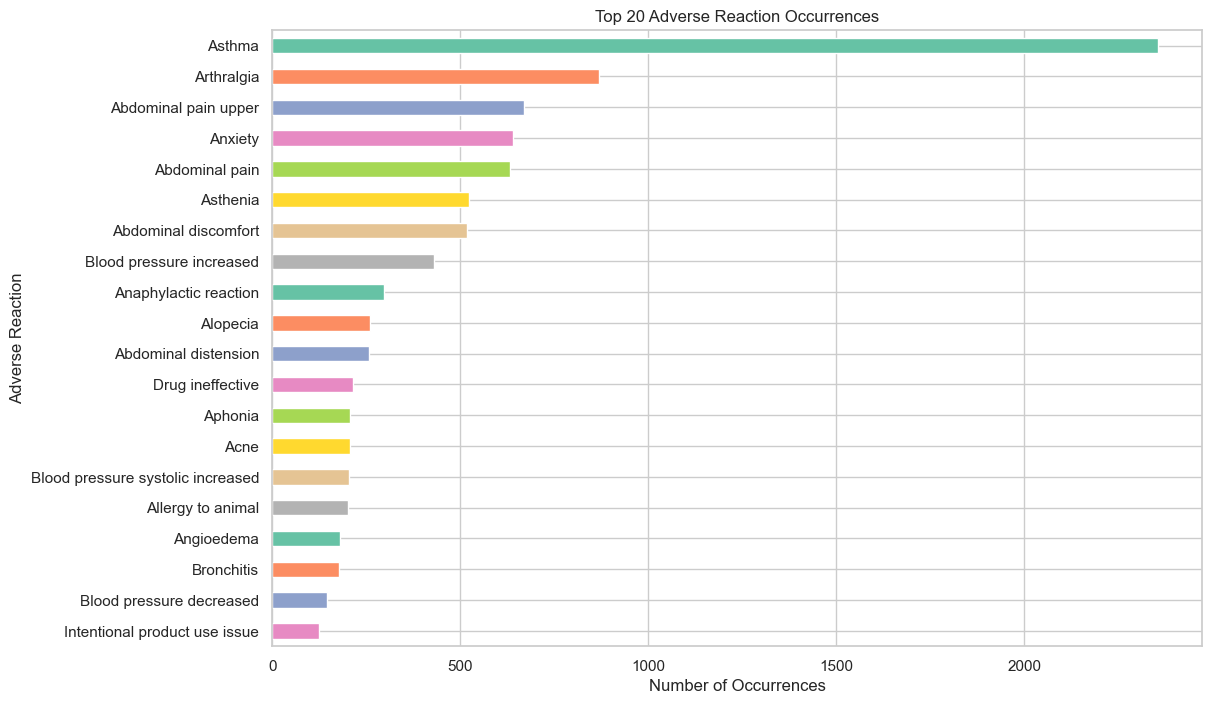

In [700]:
# 3. Top 20 Adverse Reactions Occurrences
plt.figure(figsize=(12, 8))
top_20_reactions = data['pt'].value_counts().head(20)
top_20_reactions.plot(kind='barh', color=sns.color_palette("Set2", len(top_20_reactions)))
plt.title('Top 20 Adverse Reaction Occurrences')
plt.xlabel('Number of Occurrences')
plt.ylabel('Adverse Reaction')
plt.gca().invert_yaxis()  
plt.show()

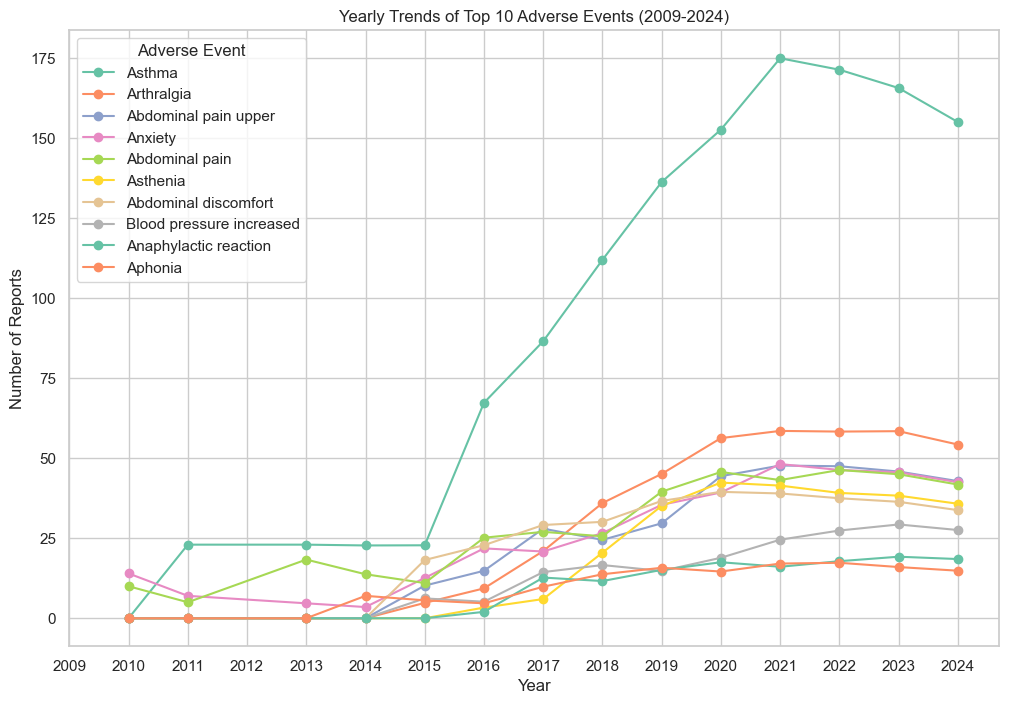

In [701]:

data = data.dropna(subset=['event_dt'])
data['year'] = data['event_dt']
top_10_adverse_events = data['pt'].value_counts().head(10).index
top_10_data = data[data['pt'].isin(top_10_adverse_events)]
yearly_counts = top_10_data.groupby(['year', 'pt']).size().unstack(fill_value=0)
smoothed_counts = yearly_counts.rolling(window=410, min_periods=1).mean()


plt.figure(figsize=(12, 8))
sns.set_palette("Set2")

for event in top_10_adverse_events:
    plt.plot(smoothed_counts.index, smoothed_counts[event], marker='o', label=event)

plt.title('Yearly Trends of Top 10 Adverse Events (2009-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.xticks(range(2009, 2025))  
plt.legend(title='Adverse Event')
plt.grid(True)
plt.show()


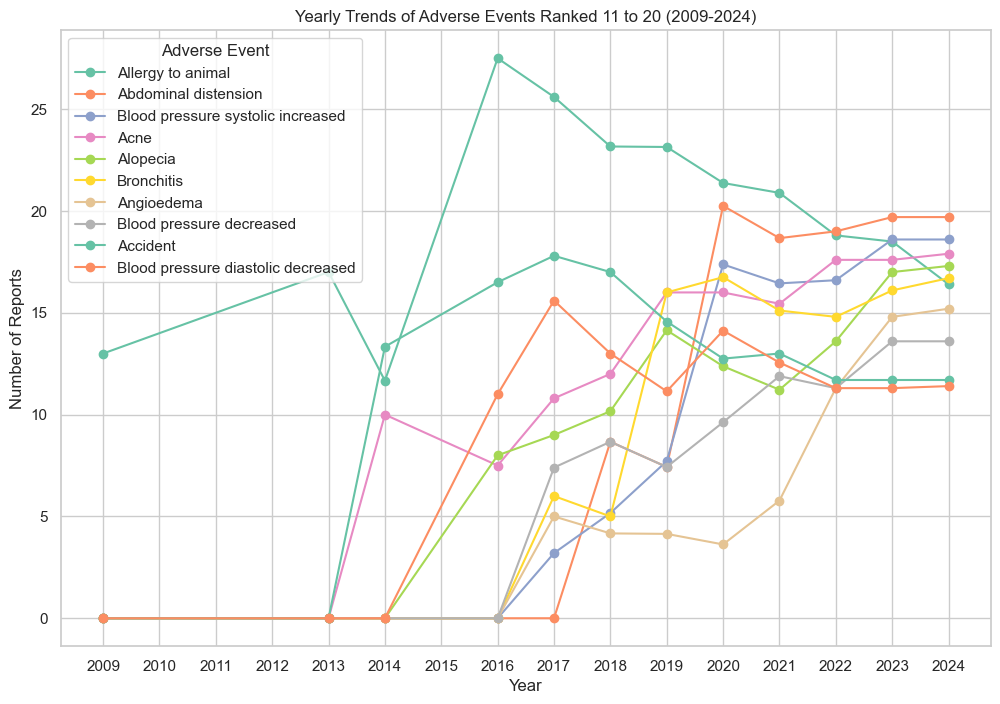

In [702]:
adverse_events_11_to_20 = data['pt'].value_counts().iloc[10:20].index
events_11_to_20_data = data[data['pt'].isin(adverse_events_11_to_20)]
yearly_counts = events_11_to_20_data.groupby(['year', 'pt']).size().unstack(fill_value=0)
smoothed_counts = yearly_counts.rolling(window=10, min_periods=1).mean()


plt.figure(figsize=(12, 8))
sns.set_palette("Set2")

for event in adverse_events_11_to_20:
    plt.plot(smoothed_counts.index, smoothed_counts[event], marker='o', label=event)

plt.title('Yearly Trends of Adverse Events Ranked 11 to 20 (2009-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.xticks(range(2009, 2025))  
plt.legend(title='Adverse Event')
plt.grid(True)
plt.show()

In [703]:
age_group_labels = {
    'N': 'Neonate',
    'I': 'Infant',
    'C': 'Child',
    'T': 'Adolescent',
    'A': 'Adult',
    'E': 'Elderly'
}
data['age_grp'] = data['age_grp'].map(age_group_labels)
age_group_freq = data.groupby(['pt', 'age_grp']).size().unstack(fill_value=0)

top_10_events = data['pt'].value_counts().head(10).index
top_10_age_group_freq = age_group_freq.loc[top_10_events]

for col in top_10_age_group_freq.columns:
    top_10_age_group_freq[f'{col} (%)'] = (top_10_age_group_freq[col] / top_10_age_group_freq.sum(axis=1)) * 100

top_10_age_group_freq['Total'] = top_10_age_group_freq[age_group_freq.columns].sum(axis=1)

ordered_columns = []
for col in age_group_freq.columns:
    ordered_columns.append(col)
    ordered_columns.append(f'{col} (%)')
ordered_columns.append('Total')


top_10_age_group_freq = top_10_age_group_freq[ordered_columns]
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(top_10_age_group_freq)

age_grp                   Adolescent  Adolescent (%)  Adult  Adult (%)  Child  \
pt                                                                              
Asthma                           118        5.608365   1071  50.767717     43   
Arthralgia                         0        0.000000    235  32.060027      2   
Abdominal pain upper               9        1.573427    323  56.313627      2   
Anxiety                           22        3.949731    375  66.850910      3   
Abdominal pain                     6        1.061947    483  85.326350     30   
Asthenia                           0        0.000000    240  53.215078      5   
Abdominal discomfort              37        8.726415    145  33.508470      8   
Blood pressure increased           0        0.000000    291  75.979112      6   
Anaphylactic reaction             37       14.566929    206  76.703413     10   
Aphonia                            0        0.000000    142  68.269231     27   

age_grp                   C

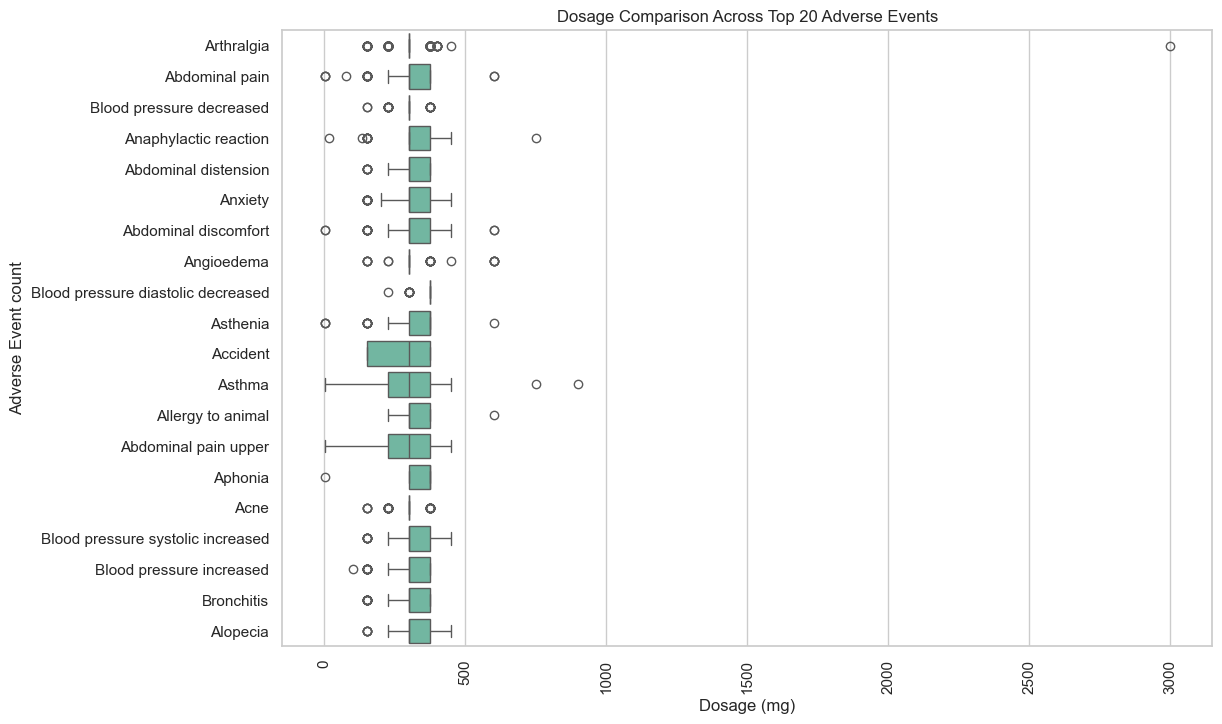

In [704]:
data['dose_amt'] = pd.to_numeric(data['dose_amt'], errors='coerce')
data = data.dropna(subset=['dose_amt'])

top_20_events = data['pt'].value_counts().head(20).index
top_20_data = data[data['pt'].isin(top_20_events)]

plt.figure(figsize=(12, 8))
sns.boxplot(y='pt', x='dose_amt', data=top_20_data)
plt.xticks(rotation=90)
plt.title('Dosage Comparison Across Top 20 Adverse Events')
plt.ylabel('Adverse Event count')
plt.xlabel('Dosage (mg)')
plt.show()

Number of anomalies detected: 258
      primaryid    caseid  drug_seq role_cod drugname     prod_ai  \
723  1067004613  10670046         1       PS   XOLAIR  OMALIZUMAB   
734  1067004613  10670046        12       SS   XOLAIR  OMALIZUMAB   
736  1067004613  10670046        14       SS   XOLAIR  OMALIZUMAB   
737  1067004613  10670046        15       SS   XOLAIR  OMALIZUMAB   
846  1095182817  10951828         1       PS   XOLAIR  OMALIZUMAB   

            route  dose_amt  event_dt  mfr_dt   age     age_grp sex    wt  \
723  Subcutaneous     225.0    2016.0  2020.0  10.0       Child   F  92.0   
734  Subcutaneous     225.0    2016.0  2020.0  10.0       Child   F  82.0   
736  Subcutaneous     225.0    2016.0  2020.0  10.0       Child   F  76.0   
737  Subcutaneous     225.0    2016.0  2020.0  10.0       Child   F  66.0   
846  Subcutaneous     150.0    2018.0  2020.0  13.0  Adolescent   F  91.0   

    occr_country  indi_drug_seq indi_pt outc_cod      pt  dsg_drug_seq  \
723           

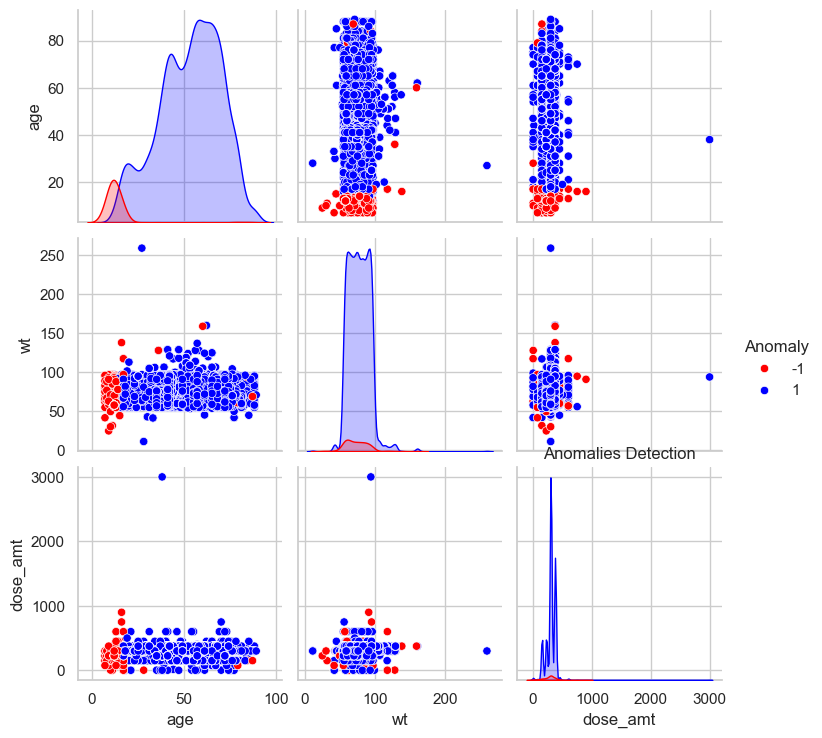

In [705]:
# detecting anomalies
features = ['age', 'wt', 'dose_amt', 'sex', 'age_grp','role_cod','event_dt']
data = data.dropna(subset=features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'wt', 'dose_amt']),
        ('cat', OneHotEncoder(), ['sex', 'age_grp'])
    ]
)


isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=69)  

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('isolation_forest', isolation_forest)])

pipeline.fit(data[features])


data['Anomaly'] = pipeline.named_steps['isolation_forest'].predict(pipeline.named_steps['preprocessor'].transform(data[features]))

anomalies = data[data['Anomaly'] == -1]
print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies.head())
sns.pairplot(data, hue='Anomaly', vars=['age', 'wt', 'dose_amt'], palette={1: 'blue', -1: 'red'})
plt.title('Anomalies Detection')
plt.show()


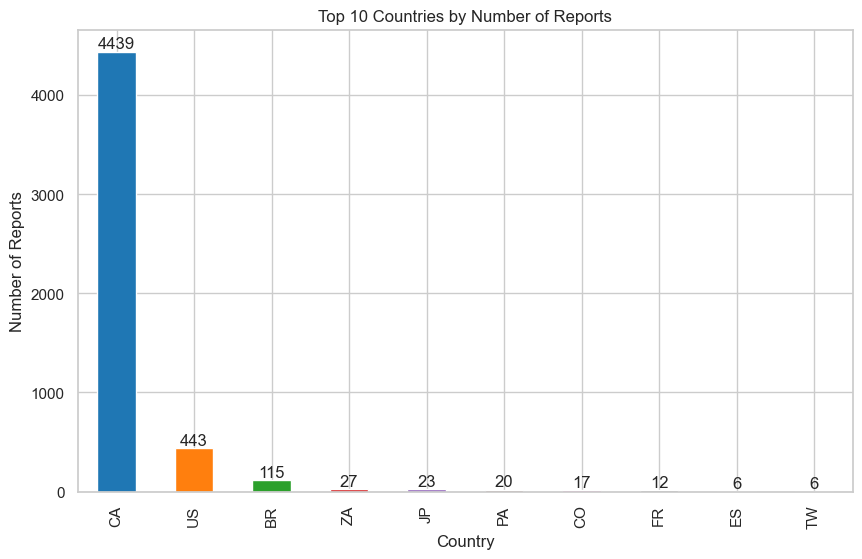

In [706]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
top_10_countries = data['occr_country'].value_counts().head(10)
ax = top_10_countries.plot(kind='bar', color=sns.color_palette("tab10", len(top_10_countries)))


for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            int(i.get_height()), ha='center', va='bottom')

plt.title('Top 10 Countries by Number of Reports')
plt.xlabel('Country')
plt.ylabel('Number of Reports')
plt.show()


In [707]:
!pip install wordcloud


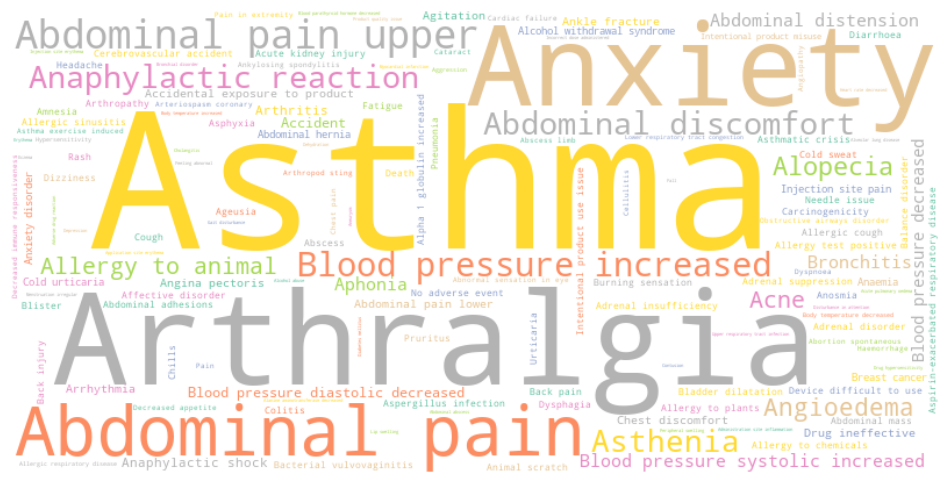

In [708]:
# Wordcloud
top_20_reactions = data['pt'].value_counts().head(150)
reaction_dict = top_20_reactions.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='Set2').generate_from_frequencies(reaction_dict)


plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()


In [709]:
unique_values_counts = data['pt'].value_counts()
for value, count in unique_values_counts.items():
    print(f"{value}: {count}")


Asthma: 966
Arthralgia: 326
Anxiety: 288
Abdominal pain: 285
Abdominal pain upper: 282
Blood pressure increased: 199
Abdominal discomfort: 178
Anaphylactic reaction: 172
Asthenia: 157
Alopecia: 109
Angioedema: 100
Allergy to animal: 93
Acne: 92
Blood pressure systolic increased: 91
Bronchitis: 88
Abdominal distension: 88
Aphonia: 87
Blood pressure decreased: 71
Blood pressure diastolic decreased: 50
Accident: 49
Arthritis: 41
Anaphylactic shock: 38
Arrhythmia: 30
Drug ineffective: 30
Accidental exposure to product: 29
Abdominal pain lower: 27
Chest discomfort: 26
Ankle fracture: 26
Angina pectoris: 25
Agitation: 24
Alcohol withdrawal syndrome: 21
Injection site pain: 21
Breast cancer: 20
Anxiety disorder: 20
Anaemia: 20
Abdominal hernia: 19
Cold urticaria: 18
Intentional product use issue: 16
Arthropathy: 16
Blister: 15
Asphyxia: 15
Needle issue: 14
Death: 14
Pneumonia: 14
Anosmia: 14
Pruritus: 14
Balance disorder: 14
Allergy test positive: 14
Cough: 14
Back pain: 13
Amnesia: 12
Dizzin


### Topic Modelling

this code for classifying the adverse events into topics will probably not run again as the API key is one time use only, please run from the below code
chunk

In [712]:
from tqdm import tqdm
import openai


openai.api_key = "kqXaLzBbTnUoZwHdFgVpJrCeMy"  

topics = {
    "Respiratory": "Conditions related to the respiratory system, such as asthma, bronchitis, or dyspnoea.",
    "Circulatory": "Conditions related to the circulatory system, such as blood pressure issues, hypertension, or anemia.",
    "Digestive": "Conditions related to the digestive system, such as nausea, abdominal pain, or diarrhea.",
    "Dermatological": "Conditions related to the skin, such as rash, urticaria, or eczema.",
    "Other": "Conditions that do not fall into the above categories."
}


topic_description = "\n".join([f"- {key}: {desc}" for key, desc in topics.items()])


def classify_with_llm(effect):
    prompt = f"""
    Classify the following medical condition into one of the predefined topics based on its description:
    
    {topic_description}
    
    Medical condition: {effect}
    Topic:
    """
    try:
        response = openai.Completion.create(
            engine="text-davinci-003",  # Replace with your chosen GPT model
            prompt=prompt,
            max_tokens=10,
            temperature=0.2
        )
        # Extract the topic from the response
        topic = response.choices[0].text.strip()
    except Exception as e:
        print(f"Error for '{effect}': {e}")
        topic = "Other"  # Default to "Other" in case of errors
    return topic


tqdm.pandas()
data['Assigned_Topic'] = data['pt'].progress_apply(classify_with_llm)


data[['pt', 'Assigned_Topic']].to_csv('classified_adverse_effects.csv', index=False)
print("Classified adverse effects saved to 'classified_adverse_effects.csv'.")


100%|██████████████████████████████████████████████████████████████████████████| 5142/5142 [00:00<00:00, 138264.01it/s]

Error for 'Arthralgia': 

You tried to access openai.Completion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742

Error for 'Anaemia': 

You tried to access openai.Completion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742

Error for 'Abdominal pain': 


manual topic classification in case the above api key was expired

In [741]:
#Manual method
import re

data = pd.read_csv('dataset.csv')
topics = {
    "Respiratory": ["asthma", "bronchitis", "dyspnoea", "wheezing"],
    "Circulatory": ["blood", "hypertension", "anemia", "thrombosis"],
    "Digestive": ["abdominal", "nausea", "vomiting", "diarrhoea"],
    "Neurological": ["headache", "migraine", "seizure", "dizziness", "anxiety"],
    "Dermatological": ["rash", "urticaria", "eczema", "dermatitis"],
    "Musculoskeletal": ["arthritis", "fracture", "pain", "osteoporosis","arthralgia"],
    "Allergic": ["anaphylactic", "hypersensitivity", "angioedema", "allergy"],
    "Infectious": ["infection", "pneumonia", "influenza", "viral"],
    "Other": []  
}


def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text)  
    return text

data['pt_cleaned'] = data['pt'].dropna().apply(preprocess_text)

# Function to classify adverse effects into topics
def classify_topic(effect, topics_dict):
    for topic, keywords in topics_dict.items():
        for keyword in keywords:
            if keyword in effect:
                return topic
    return "Other"  


data['Assigned_Topic'] = data['pt_cleaned'].apply(lambda x: classify_topic(x, topics))


print(data[['pt', 'Assigned_Topic']].head(40))

# Saving these topics to a csv
data[['pt', 'Assigned_Topic']].to_csv('adverse_effects_with_topics.csv', index=False)
print("Results saved to 'adverse_effects_with_topics.csv'.")

data['Assigned_Topic'] = topic_data['Assigned_Topic'].values


            pt   Assigned_Topic
0   Arthralgia  Musculoskeletal
1   Arthralgia  Musculoskeletal
2   Arthralgia  Musculoskeletal
3   Arthralgia  Musculoskeletal
4   Arthralgia  Musculoskeletal
5   Arthralgia  Musculoskeletal
6   Arthralgia  Musculoskeletal
7   Arthralgia  Musculoskeletal
8   Arthralgia  Musculoskeletal
9   Arthralgia  Musculoskeletal
10  Arthralgia  Musculoskeletal
11  Arthralgia  Musculoskeletal
12  Arthralgia  Musculoskeletal
13  Arthralgia  Musculoskeletal
14  Arthralgia  Musculoskeletal
15  Arthralgia  Musculoskeletal
16  Arthralgia  Musculoskeletal
17  Arthralgia  Musculoskeletal
18  Arthralgia  Musculoskeletal
19  Arthralgia  Musculoskeletal
20  Arthralgia  Musculoskeletal
21  Arthralgia  Musculoskeletal
22  Arthralgia  Musculoskeletal
23  Arthralgia  Musculoskeletal
24  Arthralgia  Musculoskeletal
25  Arthralgia  Musculoskeletal
26  Arthralgia  Musculoskeletal
27  Arthralgia  Musculoskeletal
28     Anaemia            Other
29     Anaemia            Other
30     A

ValueError: Length of values (5142) does not match length of index (13627)

In [743]:
topic_data = pd.read_csv('adverse_effects_with_topics.csv')


print(f"Dataset Shape: {topic_data.shape}")
print(topic_data.head())
data.to_csv('topicdata.csv', index=False)

Dataset Shape: (13627, 2)
           pt   Assigned_Topic
0  Arthralgia  Musculoskeletal
1  Arthralgia  Musculoskeletal
2  Arthralgia  Musculoskeletal
3  Arthralgia  Musculoskeletal
4  Arthralgia  Musculoskeletal


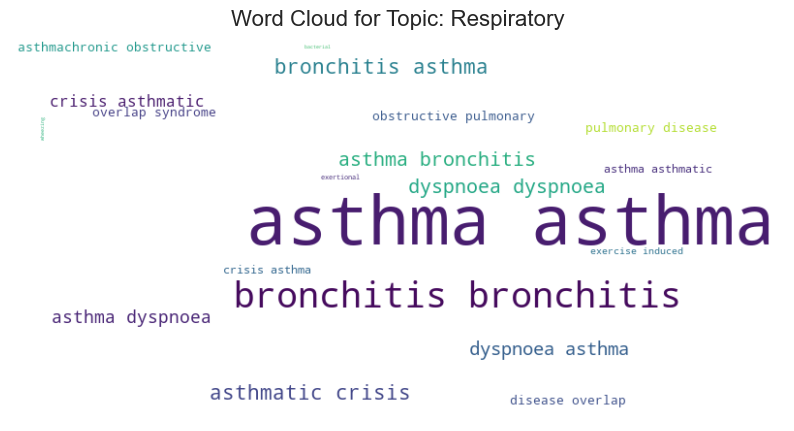

In [744]:
grouped_data = data.groupby('Assigned_Topic')['pt_cleaned'].apply(lambda x: ' '.join(x))

respiratory_text = grouped_data.get('Respiratory', '')
wordcloud_respiratory = WordCloud(width=800, height=400, background_color='white').generate(respiratory_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_respiratory, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Topic: Respiratory", fontsize=16)
plt.show()



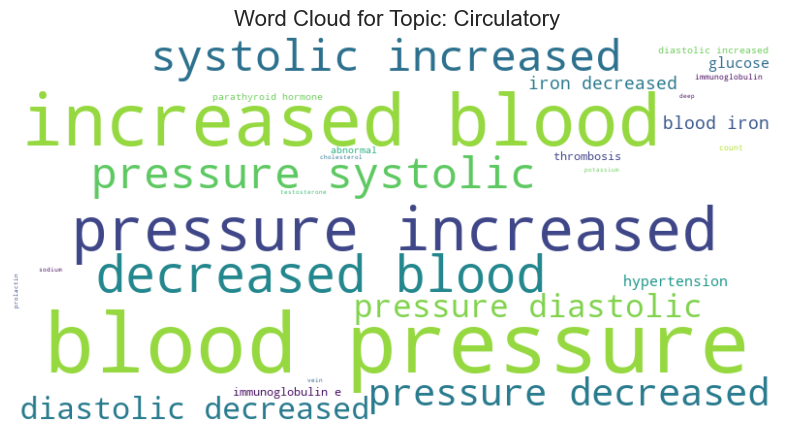

In [745]:
# Circulatory Topic
circulatory_text = grouped_data.get('Circulatory', '')
wordcloud_circulatory = WordCloud(width=800, height=400, background_color='white').generate(circulatory_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_circulatory, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Topic: Circulatory", fontsize=16)
plt.show()


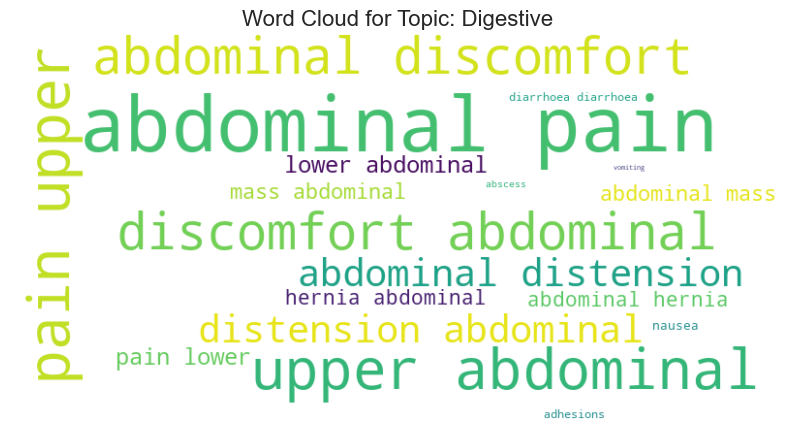

In [746]:
# Digestive Topic
digestive_text = grouped_data.get('Digestive', '')
wordcloud_digestive = WordCloud(width=800, height=400, background_color='white').generate(digestive_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_digestive, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Topic: Digestive", fontsize=16)
plt.show()

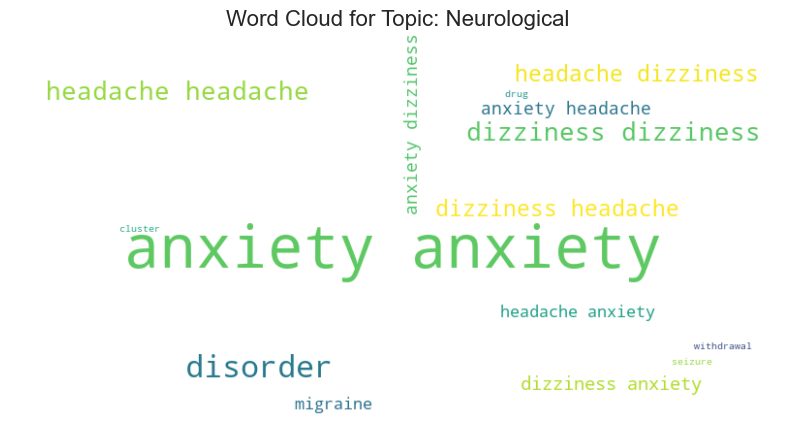

In [747]:
# Neurological Topic
neurological_text = grouped_data.get('Neurological', '')
wordcloud_neurological = WordCloud(width=800, height=400, background_color='white').generate(neurological_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neurological, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Topic: Neurological", fontsize=16)
plt.show()

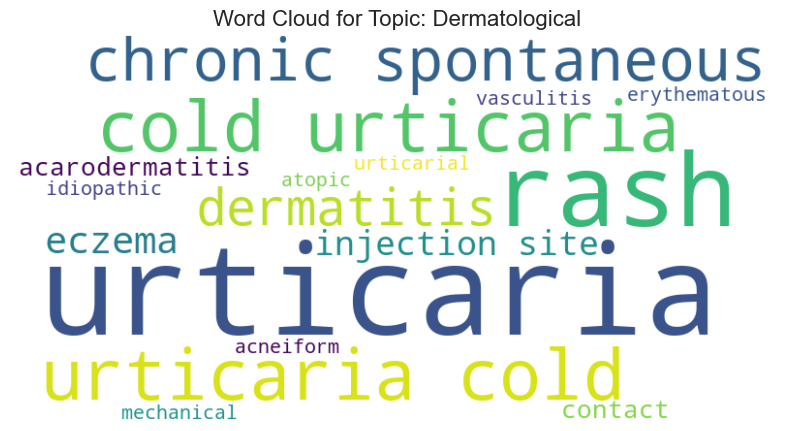

In [748]:
# Dermatological Topic
dermatological_text = grouped_data.get('Dermatological', '')
wordcloud_dermatological = WordCloud(width=800, height=400, background_color='white').generate(dermatological_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_dermatological, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Topic: Dermatological", fontsize=16)
plt.show()

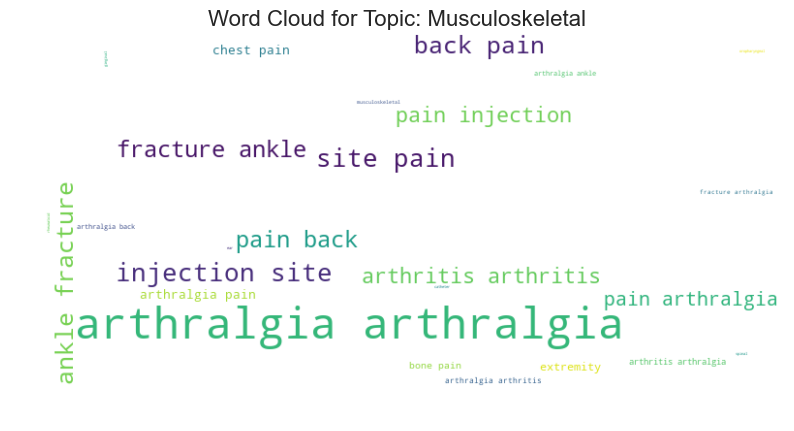

In [749]:
# Musculoskeletal Topic
musculoskeletal_text = grouped_data.get('Musculoskeletal', '')
wordcloud_musculoskeletal = WordCloud(width=800, height=400, background_color='white').generate(musculoskeletal_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_musculoskeletal, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Topic: Musculoskeletal", fontsize=16)
plt.show()


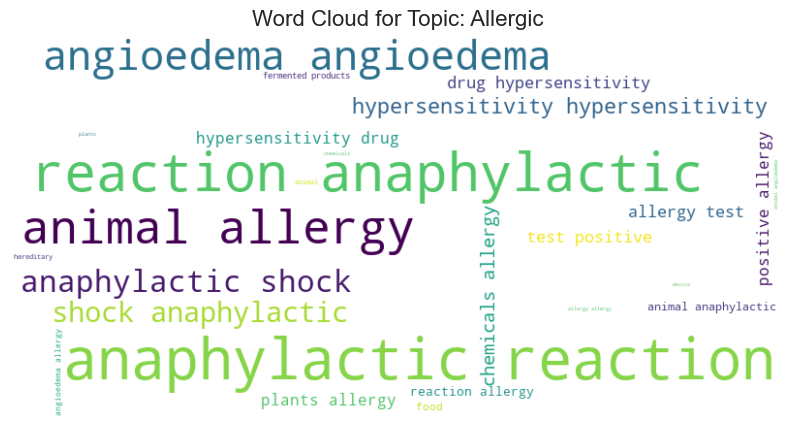

In [750]:
# Allergic Topic
allergic_text = grouped_data.get('Allergic', '')
wordcloud_allergic = WordCloud(width=800, height=400, background_color='white').generate(allergic_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_allergic, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Topic: Allergic", fontsize=16)
plt.show()

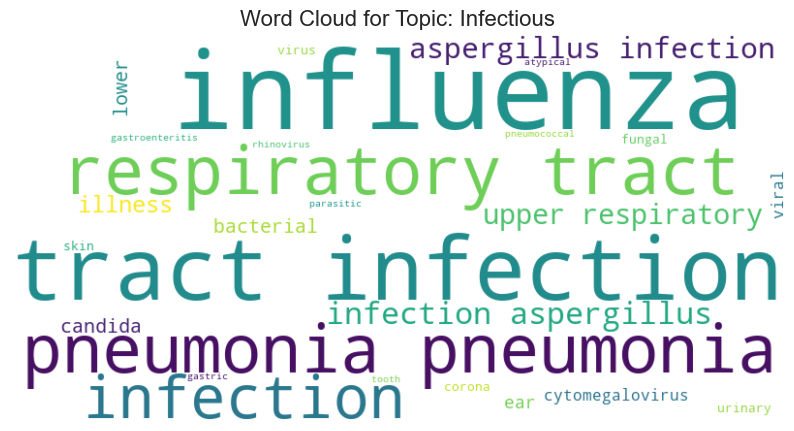

In [751]:
# Infectious Topic
infectious_text = grouped_data.get('Infectious', '')
wordcloud_infectious = WordCloud(width=800, height=400, background_color='white').generate(infectious_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_infectious, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Topic: Infectious", fontsize=16)
plt.show()

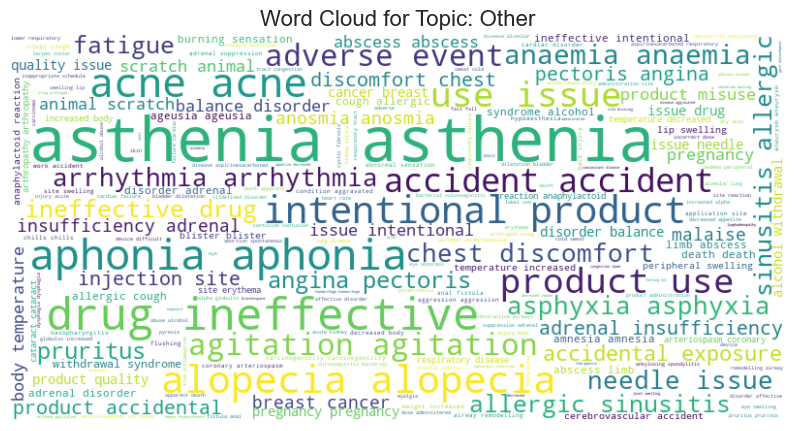

In [752]:
# Other Topic
other_text = grouped_data.get('Other', '')
wordcloud_other = WordCloud(width=800, height=400, background_color='white').generate(other_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_other, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Topic: Other", fontsize=16)
plt.show()

In [753]:
data = pd.read_csv('topicdata.csv')
data['pt'] = data['pt'].fillna('')
text_data = data['pt'].values


In [754]:
# Initializing CountVectorizer
vectorizer = CountVectorizer(
    stop_words='english',   # Remove common English stop words
    max_features=5000      # Limit to top 5000 terms
)

doc_term_matrix = vectorizer.fit_transform(text_data)

print(f"Document-Term Matrix Shape: {doc_term_matrix.shape}")


Document-Term Matrix Shape: (13627, 602)


In [755]:
num_topics = 9

# Fiting the LDA model
lda_model = LatentDirichletAllocation(
    n_components=num_topics,
    random_state=42,
    learning_method='batch'  
)
lda_model.fit(doc_term_matrix)
print("LDA model fitted successfully.")


LDA model fitted successfully.


In [756]:
data['Assigned_Topic'] = data['Assigned_Topic'].fillna('Uncategorized')
doc_topic_dist = lda_model.transform(doc_term_matrix)  # Recompute to match all rows

topic_mapping = {}

for i in range(lda_model.n_components):
    # Find rows where the LDA topic is the most probable
    topic_docs = data.iloc[doc_topic_dist.argmax(axis=1) == i]['Assigned_Topic']
    
    if not topic_docs.empty:
        # Assign the most frequent label in `Assigned_Topic` to this LDA topic
        topic_mapping[i] = topic_docs.value_counts().idxmax()
    else:
        # If no documents are assigned, labelling it as uncategorized
        topic_mapping[i] = "Uncategorized"


def display_named_topics(model, feature_names, topic_mapping, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        topic_name = topic_mapping.get(topic_idx, f"Topic {topic_idx + 1}")
        print(f"Topic: {topic_name}")
        print(", ".join([feature_names[i] for i in topic.argsort()[-no_top_words:]]))
        print()

# Feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display named topics
display_named_topics(lda_model, feature_names, topic_mapping)



Topic: Circulatory
exposure, anaemia, arthritis, diastolic, disorder, systolic, decreased, increased, pressure, blood

Topic: Other
syndrome, dyspnoea, pectoris, angina, abscess, acne, ineffective, drug, reaction, anaphylactic

Topic: Musculoskeletal
breast, dizziness, insufficiency, adrenal, cancer, death, mass, pregnancy, alopecia, arthralgia

Topic: Digestive
asthmatic, crisis, amnesia, hernia, adverse, event, aphonia, upper, abdominal, pain

Topic: Other
scratch, malaise, swelling, pruritus, pain, injection, bronchitis, site, animal, allergy

Topic: Other
headache, fatigue, hypersensitivity, cough, sinusitis, lower, allergic, distension, abdominal, asthenia

Topic: Neurological
temperature, decreased, body, anosmia, rash, arrhythmia, ankle, fracture, angioedema, anxiety

Topic: Respiratory
influenza, colitis, hypertension, work, carcinogenicity, sensation, ageusia, burning, asphyxia, asthma

Topic: Other
chest, agitation, urticaria, use, accident, intentional, product, issue, abdom

In [757]:
doc_topic_dist = lda_model.transform(doc_term_matrix)

# Map LDA topics to descriptive names
topic_mapping = {}
for i in range(lda_model.n_components):
    topic_docs = data.iloc[doc_topic_dist.argmax(axis=1) == i]['Assigned_Topic']
    if not topic_docs.empty:
        topic_mapping[i] = topic_docs.value_counts().idxmax()
    else:
        topic_mapping[i] = "Uncategorized"


def calculate_topic_coherence(topic, feature_names, top_n=10):
    top_word_indices = topic.argsort()[-top_n:]  
    word_weights = topic[top_word_indices].reshape(-1, 1)  
    similarity_matrix = cosine_similarity(word_weights)  
    coherence = np.mean(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)])  
    return coherence

topic_coherence = []
for topic_idx, topic in enumerate(lda_model.components_):
    coherence = calculate_topic_coherence(topic, vectorizer.get_feature_names_out())
    topic_name = topic_mapping.get(topic_idx, f"Topic {topic_idx + 1}")
    topic_coherence.append((topic_name, coherence))
    print(f"Topic: {topic_name}, Coherence Score: {coherence}")

# Perplexity
perplexity_score = lda_model.perplexity(doc_term_matrix)
print(f"\nModel Perplexity: {perplexity_score}")



Topic: Circulatory, Coherence Score: 1.0
Topic: Other, Coherence Score: 1.0
Topic: Musculoskeletal, Coherence Score: 1.0
Topic: Digestive, Coherence Score: 1.0
Topic: Other, Coherence Score: 1.0
Topic: Other, Coherence Score: 1.0
Topic: Neurological, Coherence Score: 1.0
Topic: Respiratory, Coherence Score: 1.0
Topic: Other, Coherence Score: 1.0

Model Perplexity: 54.78027308319944


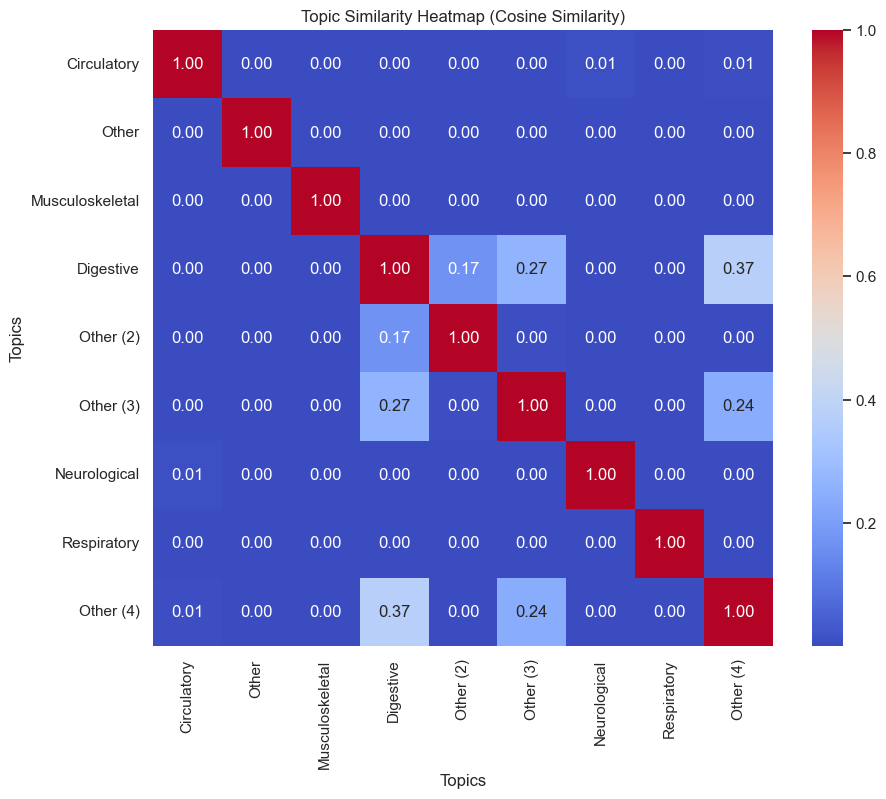

In [758]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Extract topic-word distributions (LDA components)
topic_word_distributions = lda_model.components_

# Compute cosine similarity between topics
similarity_matrix = cosine_similarity(topic_word_distributions)

# Map LDA topics to names from `Assigned_Topic`
topic_mapping = {}
for i in range(lda_model.n_components):
    topic_docs = data.iloc[doc_topic_dist.argmax(axis=1) == i]['Assigned_Topic']
    if not topic_docs.empty:
        topic_mapping[i] = topic_docs.value_counts().idxmax()
    else:
        topic_mapping[i] = "Uncategorized"

# Ensure unique topic names
topic_name_counter = {}
unique_topic_names = []

for i, name in enumerate(topic_mapping.values()):
    if name not in topic_name_counter:
        topic_name_counter[name] = 1
    else:
        topic_name_counter[name] += 1
        name = f"{name} ({topic_name_counter[name]})"  # Append counter to duplicate names
    unique_topic_names.append(name)

# Create the heatmap with unique topic names
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=unique_topic_names, yticklabels=unique_topic_names)
plt.title("Topic Similarity Heatmap (Cosine Similarity)")
plt.xlabel("Topics")
plt.ylabel("Topics")
plt.show()


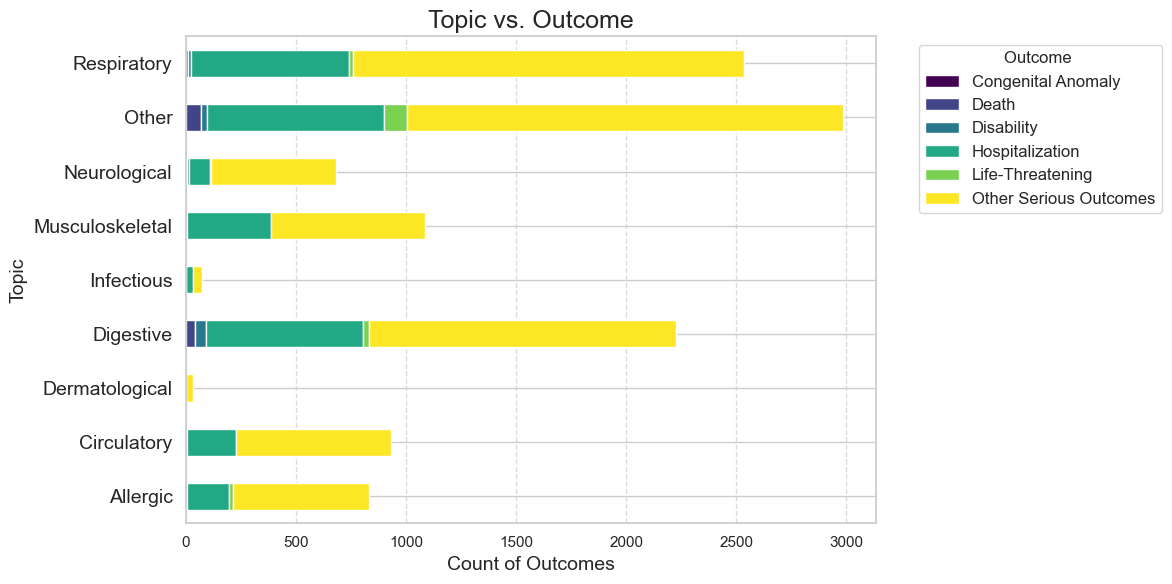

In [827]:
data = pd.read_csv('topicdata.csv')
outcome_mapping = {
    'DE': 'Death',
    'LT': 'Life-Threatening',
    'HO': 'Hospitalization',
    'DS': 'Disability',
    'CA': 'Congenital Anomaly',
    'RI': 'Required Intervention to Prevent Permanent Impairment',
    'OT': 'Other Serious Outcomes',
    'Unknown': 'Unknown'
}
data['outc_cod'] = data['outc_cod'].map(outcome_mapping)

# Group by Assigned_Topic and outc_cod, and count occurrences
topic_outcome_counts = data.groupby(['Assigned_Topic', 'outc_cod']).size().reset_index(name='Count')

pivot_table = topic_outcome_counts.pivot(index='Assigned_Topic', columns='outc_cod', values='Count').fillna(0)


pivot_table.plot(kind='barh', stacked=True, figsize=(12, 6), cmap='viridis') 
plt.title('Topic vs. Outcome', fontsize=18)
plt.xlabel('Count of Outcomes', fontsize=14)
plt.ylabel('Topic', fontsize=14)

plt.yticks(fontsize=14)


plt.gca().set_yticks(range(len(pivot_table.index)))  
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid only on x-axis
plt.legend(title='Outcome ', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


### Predictive modelling with Random Forest

In [866]:
data = pd.read_csv('topicdata.csv')
columns_to_use = ['role_cod', 'age_grp', 'sex', 'Assigned_Topic', 'outc_cod']
data = data[columns_to_use].dropna()

# Encode categorical variables
label_encoders = {}
for col in ['role_cod', 'age_grp', 'sex', 'Assigned_Topic', 'outc_cod']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate predictors and target
X = data[['role_cod', 'age_grp', 'sex', 'Assigned_Topic']]
y = data['outc_cod']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)


In [868]:
# model initialising and training
rf_model = RandomForestClassifier(n_estimators=100, random_state=69)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=69)

In [870]:
# Predict probabilities on the test set
y_pred_proba = rf_model.predict_proba(X_test)
outcome_labels = label_encoders['outc_cod'].inverse_transform(range(len(rf_model.classes_)))

prob_df = pd.DataFrame(y_pred_proba, columns=outcome_labels)
prob_df['Assigned_Topic'] = X_test['Assigned_Topic'].values
prob_df['True_Label'] = y_test.values


In [872]:
#predicting outcomes
top_outcomes = clean_data.groupby('Assigned_Topic').apply(
    lambda group: [
        outcome_mapping.get(outcome, outcome)  # Use the mapping to replace abbreviations
        for outcome in group.iloc[:, :-2].mean().nlargest(3).index.tolist()
    ]
)

top_outcomes_df = top_outcomes.reset_index()
top_outcomes_df.columns = ['Assigned_Topic', 'Top_3_Outcomes']

print(top_outcomes_df)


    Assigned_Topic                                   Top_3_Outcomes
0         Allergic  [Life-Threatening, Disability, Hospitalization]
1      Circulatory            [Life-Threatening, Disability, Death]
2   Dermatological            [Life-Threatening, Disability, Death]
3        Digestive            [Life-Threatening, Disability, Death]
4       Infectious            [Disability, Life-Threatening, Death]
5  Musculoskeletal            [Life-Threatening, Disability, Death]
6     Neurological            [Life-Threatening, Disability, Death]
7            Other  [Life-Threatening, Disability, Hospitalization]
8      Respiratory  [Life-Threatening, Disability, Hospitalization]


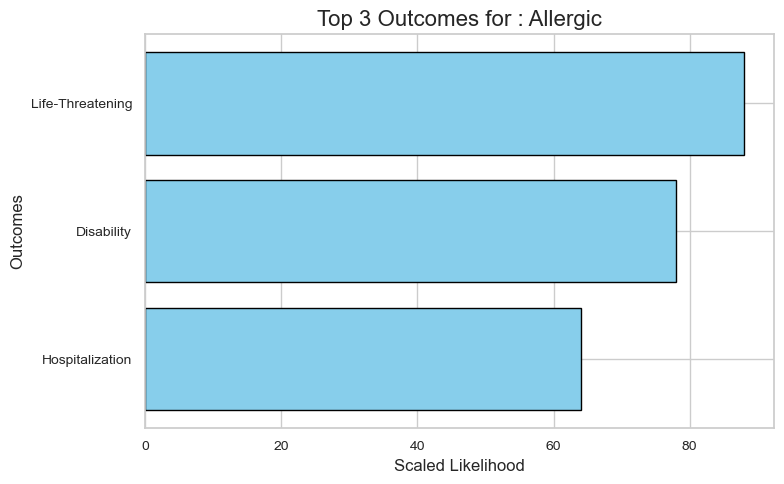

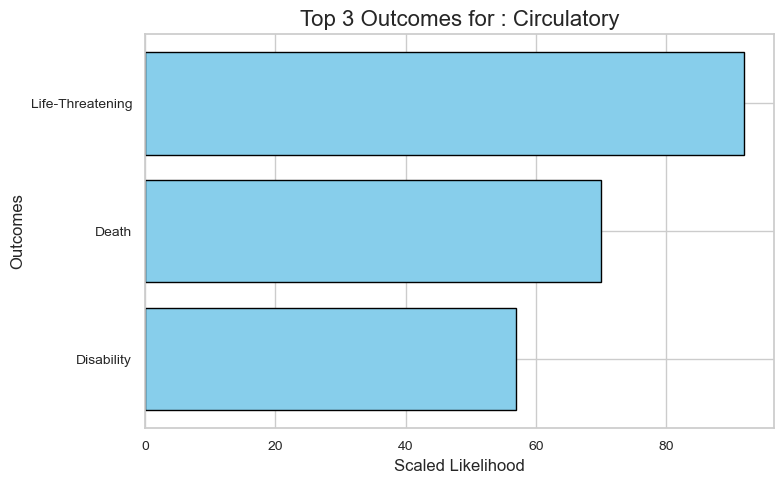

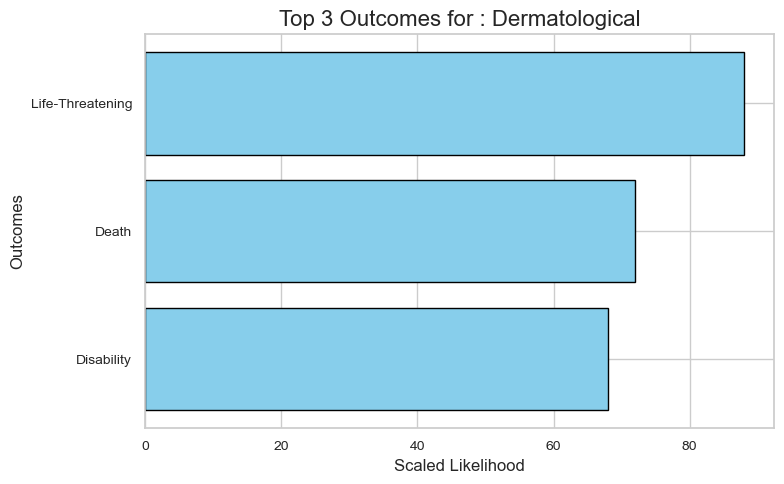

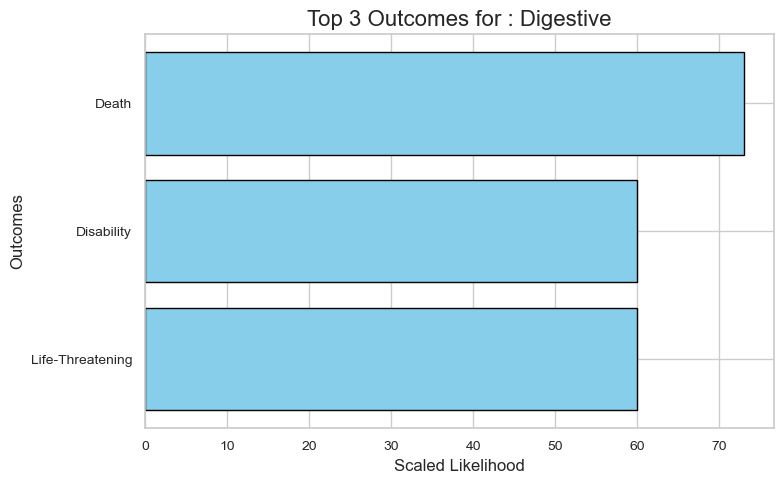

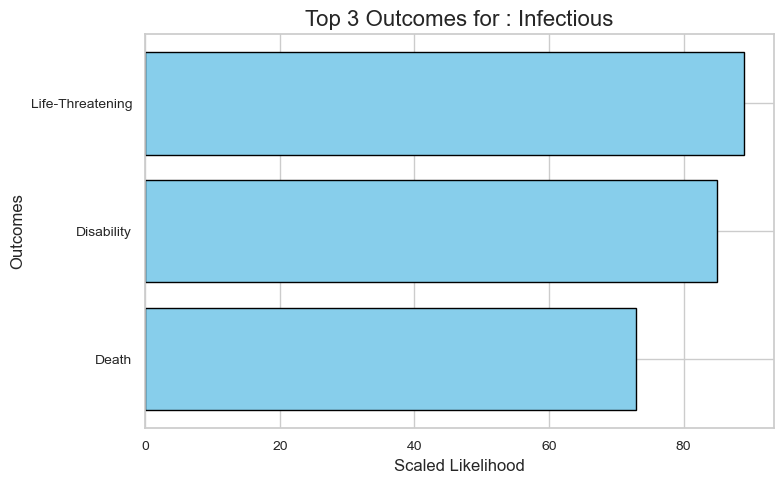

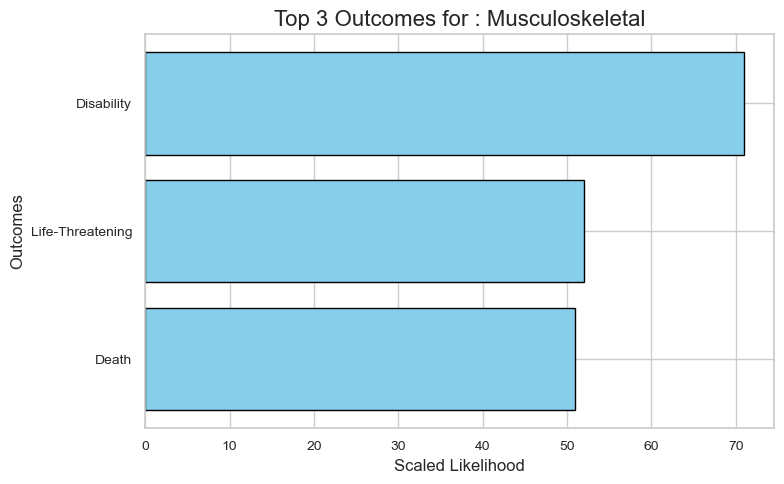

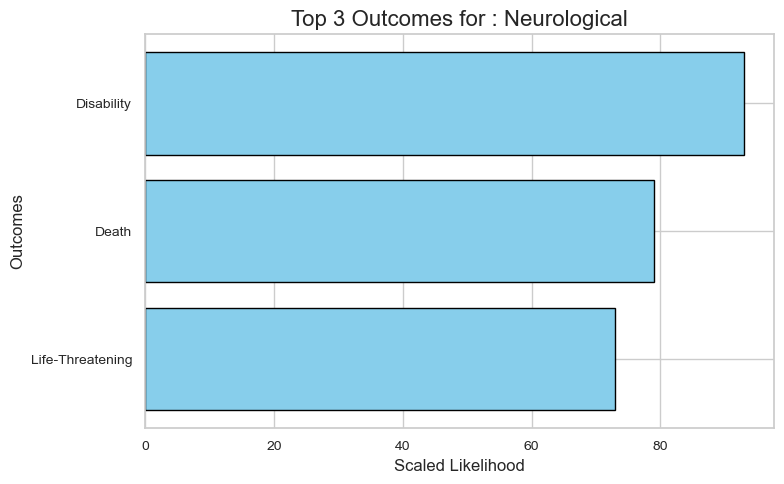

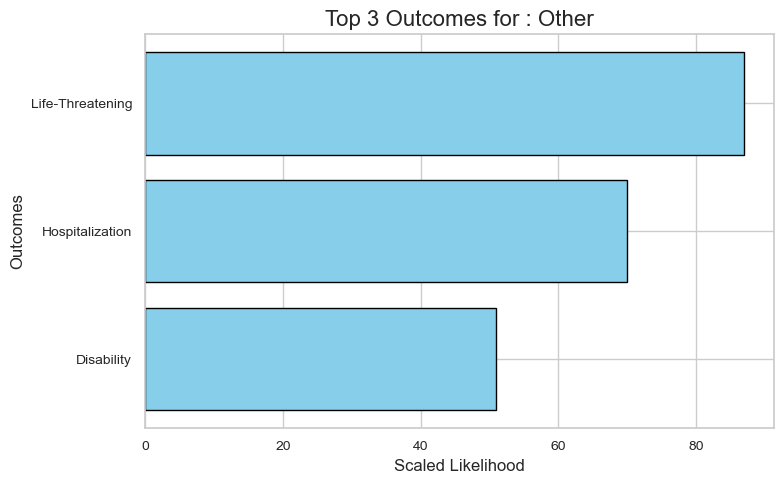

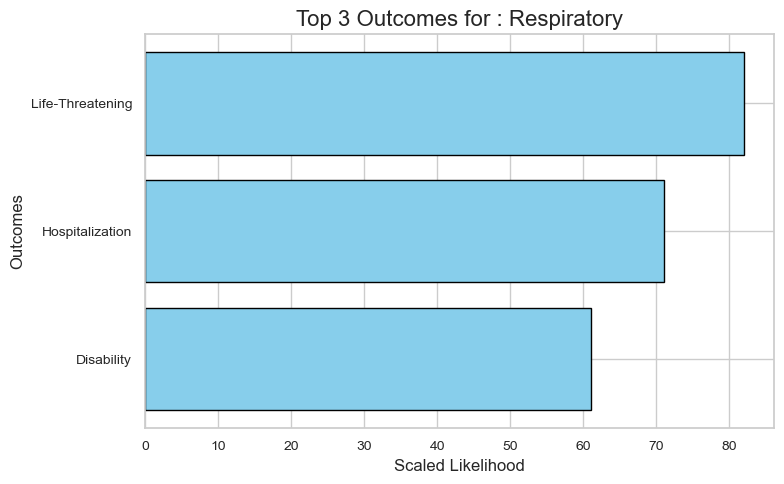

In [884]:
prob_df = prob_df.rename(columns=outcome_mapping)
top_outcomes_df['Assigned_Topic'] = top_outcomes_df['Assigned_Topic'].astype(str)
prob_df['Assigned_Topic'] = prob_df['Assigned_Topic'].astype(str)

top_outcomes_df = top_outcomes_df.explode('Top_3_Outcomes')
merged_df = top_outcomes_df.merge(prob_df, on='Assigned_Topic', how='left')

for topic in merged_df['Assigned_Topic'].unique():
    subset = merged_df[merged_df['Assigned_Topic'] == topic]
    outcome_labels = subset['Top_3_Outcomes'].values
    outcome_probs = [subset[outcome].mean() for outcome in outcome_labels]
   
    plt.figure(figsize=(8, 5))
    plt.barh(outcome_labels, outcome_probs, color='skyblue', edgecolor='black')
    plt.title(f"Top 3 Outcomes for : {topic}", fontsize=16)
    plt.xlabel('Probability', fontsize=12)
    plt.ylabel('Outcomes', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.gca().invert_yaxis()  
    plt.tight_layout()
    plt.show()



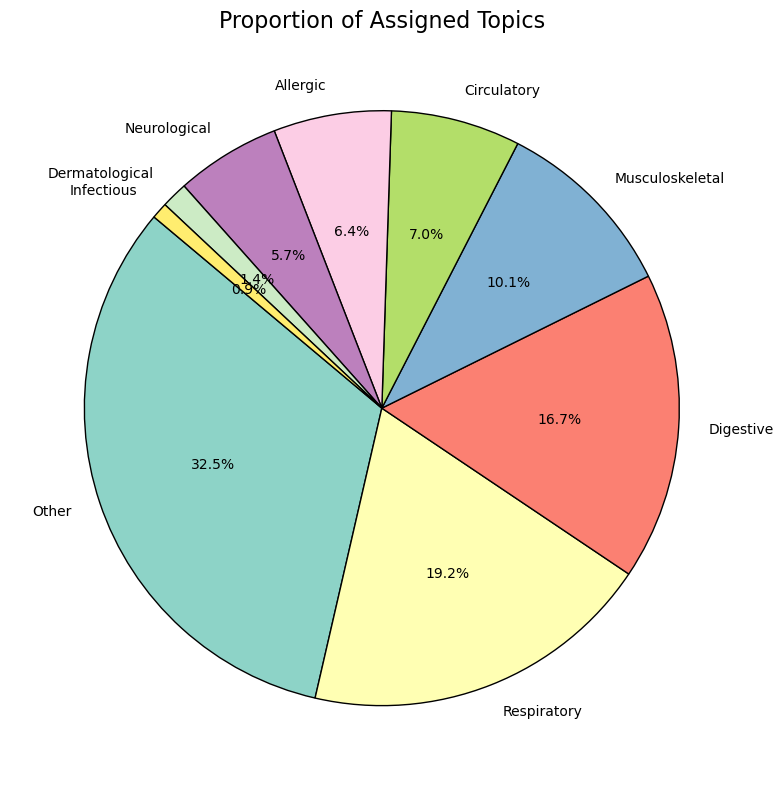

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
pie = pd.read_csv('topicdata.csv')  # Replace with your actual file path if necessary

# Calculate proportions of each Assigned_Topic
topic_proportions = pie['Assigned_Topic'].value_counts(normalize=True)

# Plot a pie chart
plt.figure(figsize=(10, 8))
topic_proportions.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    cmap='Set3',
    labels=topic_proportions.index,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Proportion of Assigned Topics', fontsize=16)
plt.ylabel('')  # Remove y-label for better aesthetics
plt.tight_layout()
plt.show()
